In [9]:
#APPENDIX A:GENERAL DATASET (YRBSS)
#import relevant packages & libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

#import the chosen dataset using pandas and read into a dataframe
pd.read_csv("https://course-resources.minerva.edu/uploaded_files/mu/00294341-4390/yrbss-samp.csv")
df.head(9)

,age,gender,grade,hispanic,race,height,weight,helmet_12m,text_while_driving_30d,physically_active_7d,hours_tv_per_school_day,strength_training_7d,school_night_hours_sleep
0,16.0,female,11.0,not,Black or African American,1.50,52.62,never,1-2,0,4,0,8
1,17.0,male,11.0,not,White,1.78,74.84,rarely,0,7,1,5,7
2,17.0,male,11.0,not,White,1.75,106.60,never,0,7,2,0,7
3,15.0,male,10.0,hispanic,NaN,1.68,66.68,never,did not drive,3,2,1,5
4,18.0,male,12.0,not,Black or African American,1.70,80.29,never,did not drive,0,2,2,6
5,15.0,female,9.0,not,Black or African American,1.57,46.27,NaN,did not drive,4,NaN,3,5
6,16.0,male,10.0,not,White,1.78,81.65,always,0,7,1,6,7
7,16.0,male,10.0,not,Black or African American,1.63,56.70,never,0,5,3,4,7
8,14.0,male,9.0,hispanic,White,1.63,54.43,never,0,7,5+,7,7


In [22]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

#filter relevant columns and rows
df=pd.read_csv("https://course-resources.minerva.edu/uploaded_files/mu/00294341-4390/yrbss-samp.csv")
group1 = df.loc[df['age'] >= 16, 'physically_active_7d']
group2 = df.loc[df['age'] <= 15, 'physically_active_7d']

#calculate the skewness of each histogram
print ("Skewness1:", group1.skew())
print ("Skewness2:", group2.skew())

Skewness1: 0.11073398256770325
Skewness2: -0.4322329864399809


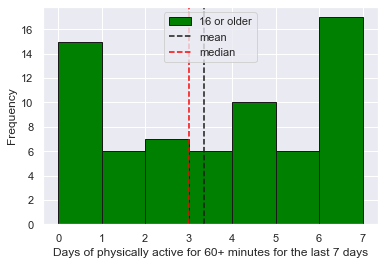

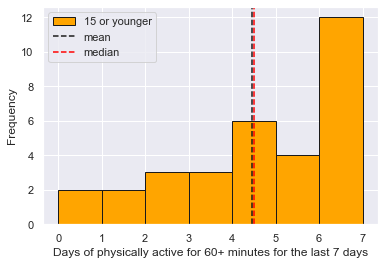

In [11]:
#APPENDIX A: Create two histograms for each group

import seaborn as sns
sns.set()

df[['age', 'physically_active_7d']].dropna()

#formatting the histogram using color, label, and bins
plt.hist(group1, color = 'green', bins=7, label = "16 or older", edgecolor='k')

#add mean and median lines to the histogram
plt.axvline(group1.mean(), color='k', linestyle='dashed', linewidth=1.5, label = 'mean')
plt.axvline(group1.median(), color='red', linestyle='dashed', linewidth=1.5, label = 'median')

plt.legend(loc = 'upper center')
plt.xlabel('Days of physically active for 60+ minutes for the last 7 days')
plt.ylabel('Frequency')
plt.show()

#formatting the histogram using color, label, and bins
plt.hist(group2, color = 'orange', bins=7, label = "15 or younger", edgecolor='k')

#add mean and median lines to the histogram
plt.axvline(group2.mean(), color='k', linestyle='dashed', linewidth=1.5, label = 'mean')
plt.axvline(group2.median(), color='red', linestyle='dashed', linewidth=1.5, label = 'median')
plt.legend()
plt.xlabel('Days of physically active for 60+ minutes for the last 7 days')
plt.ylabel('Frequency')
plt.show()

In [12]:
from scipy import stats

def difference_of_means_test(data1,data2,tails):
    # the len function returns the sample size of two subgroups
    n1 = len(group1)
    n2 = len(group2)

    #the mean function returns the number of days physically active of two subgroups
    x1 = np.mean(group1)
    x2 = np.mean(group2)
    point_estimate = x2 - x1 #point estimate is the mean of the sampling distribution, which is the same as the population mean

    #numpy calculates the sample standard deviation of two subgroups
    s1 = np.std(data1,ddof=1) # Bessel’s correction uses n-1 in denominator to take into account of small sample size
    s2 = np.std(data2,ddof=1)

    # calculate the standard error of the mean difference
    SE = np.sqrt(s1**2/n1 + s2**2/n2)
    
    # Tscore is a conversion of the difference between 2 means in a standardardize unit of standard error
    Tscore = np.abs(point_estimate)/SE
    
    # the degree of freedom = chosen sample size (n) - 1
    # choose the smaller sample size between 2 subgroup
    df = min(n1,n2) - 1 
    
    # convert Tscore into the probability as an area under the curve. 
    # 2 tailed-test requires doubling the result because the probability is equally distributed between 2 tails
    pvalue = tails * (1 - stats.t.cdf(Tscore,df))
    
    # Calculate the effect size based on Cohen's d formula
    SDpooled = np.sqrt((s1**2*(n1-1) + s2**2*(n2-1))/ (n1 + n2 -2)) 
    Cohensd = point_estimate/SDpooled
    
    print("point_estimate =", point_estimate)
    print ("SE = ", SE)
    print('T-score =',Tscore)
    print('p =', round(pvalue,2))
    print('d =',Cohensd)
    
difference_of_means_test (group1, group2, 2)
    

point_estimate = 1.1105410447761193
SE =  0.5127257728445671
T-score = 2.165955182270075
p = 0.04
d = 0.4430771243871281


In [13]:
#difference_of_means_test(group1, group2, 2) 
#confidence interval
#call the function

from scipy import stats
def confidence_interval(data1,data2,tails):
    # the len function returns the sample size of two subgroups
    n1 = len(data1)
    n2 = len(data2)

    #the mean function returns the number of days physically active of two subgroups
    x1 = np.mean(data1)
    x2 = np.mean(data2)
    point_estimate = x2 - x1

    #numpy calculates the sample standard deviation of two subgroups
    s1 = np.std(data1,ddof=1) # Bessel’s correction uses n-1 in denominator to take into account of small sample size
    s2 = np.std(data2,ddof=1)

    # calculate the standard error of the mean difference
    SE = np.sqrt(s1**2/n1 + s2**2/n2)
    
    # The difference of means test requires the degree of freedom formula of both subgroups
    df_pooled = n1 + n2 - 2
    # the t critical value is used in the formular of confidence level of difference of means test
    t_critical = stats.t.ppf(0.05/tails, df_pooled)
    
    # confidence interval is expressed as equal intervals from t critical to the point estimate in standardardized standard error unit
    Confidence_interval = [round(point_estimate + t_critical*SE,2), round(point_estimate- t_critical*SE,2)]
    print("point_estimate =", point_estimate)
    print ("t critical value =", t_critical)
    print ("SE = ", SE)
    print("Confidence interval = ", Confidence_interval)
confidence_interval(group1, group2, 2)


point_estimate = 1.1105410447761193
t critical value = -1.9847231859278835
SE =  0.5127257728445671
Confidence interval =  [0.09, 2.13]


In [14]:
from scipy import stats

#function to find the confidence intervals of each subgroup
def confidence_interval (data_list):
    n = len(data_list) #sample size of each subgroup
    x = np.mean(data_list) #calculate the mean of each subgroup
    s = np.std(data_list, ddof=1)/np.sqrt(n) #calculate the standard error using the formula: s/sqrt(n)
    
    C = 0.9 #confidence level 90%
    
    df = n-1 #degrees of freedom = chosen sample size - 1
    alpha = (1-C) / 2
    t = stats.t.ppf(q = 1 - 0.1/2, df = n-1) #tscore
    lower = x - t * s / np.sqrt(n) #lower bound
    upper = x + t * s / np.sqrt(n) #upper bound
    
    print ('Standard Error =', s)
    print ('Confidence interval =', lower, ';', upper)
    
confidence_interval (group1)
confidence_interval (group2)
    

Standard Error = 0.31879287566465864
Confidence interval = 3.2932352431079477 ; 3.423182667339814
Standard Error = 0.40157044284224414
Confidence interval = 4.348388010637793 ; 4.589111989362207


In [15]:
def power_calculation(data1,data2, null_mean):
    n1 = len(data1)
    n2 = len(data2)
    SE = np.sqrt(s1**2/n1 + s2**2/n2)
    x1 = np.mean(data1)
    x2 = np.mean(data2)
    point_estimate = x2 - x1
    df = min(n1, n2) - 1 
    # I calculate the left-tailied and right-tailed area seperatly (significance level = 0.025 for each tail)
    left_tailed_zscore = stats.norm.ppf(.025)   # = -1.96
    right_tailed_zscore = stats.norm.ppf(.975)  # = 1.96
    
    # I reject the null hypothesis if 1.96 <= Z <= -1.96 <=> 1.96 <= (the true population mean - null mean) /SE <= -1.96
    #The true population mean = point estimate = (+/-)1.96 * SE + null mean
    X1 = left_tailed_zscore * SE + null_mean
    X2 = right_tailed_zscore * SE + null_mean
# Call the values that reject the null hypothesis given the alternative is true: reject value
    # Left-tail: P (Reject vallue <= X1 | alternative is true) =>  P (Z1 <= (X1 - point estimate)/SE)) => Left-tailed p-value
    Z1 = (X1 - point_estimate)/SE
    Left_tailed_percentile = stats.t.cdf(Z1, df)
    #Right-tail: P ( X >= X2 | M = point estimate) =  P (Z2 <= (X2 - point estimate)/SE)) => Right-tailed p-value
    Z2 = (X2 - point_estimate)/SE
    Right_tailed_pvalue = 1 - stats.t.cdf(Z2,df)
    
    # Power = 1 - β (the probability commiting type II error). 
    # Type II error accepting the null hypothesis even if the alternative is true
    power = Left_tailed_percentile + Right_tailed_pvalue
    print( "Power = ", power)
    
power_calculation (group1, group2, 0)

NameError: name 's1' is not defined

In [21]:
#APPENDIX A: DESCRIPTIVE STATISTICS

print ("The summary statistics for the number of days physically active of group 1 are:\n",group1.describe(), '\n')
print ("The summary statistics for the number of days physically active of group 2 are:\n",group2.describe())

The summary statistics for the number of days physically active of group 1 are:
 count    67.000000
mean      3.358209
std       2.609432
min       0.000000
25%       1.000000
50%       3.000000
75%       5.500000
max       7.000000
Name: physically_active_7d, dtype: float64 

The summary statistics for the number of days physically active of group 2 are:
 count    32.000000
mean      4.468750
std       2.271625
min       0.000000
25%       3.000000
50%       4.500000
75%       7.000000
max       7.000000
Name: physically_active_7d, dtype: float64
